In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import holidays

In [2]:
# Consumption Data
#consumption_data = input("Enter the consumption data file path (CSV): ")
consumption_data = 'C:/Users/Diego Galdino/Desktop/New folder/Consumption2.xlsx'

# Price Data
price_Entosoe = 'C:/Users/Diego Galdino/OneDrive - Groene Cadans B.V/Algorithms/Energy-Price-ENTSOE/EntsoeEnergyPrice.csv'
price_Easy = 'C:/Users/Diego Galdino/OneDrive - Groene Cadans B.V/Algorithms/Energy-Price-Easy/EasyEnergyPrice.csv'

In [3]:
# Read consumption data
df_consumption = pd.read_excel(consumption_data)

while True:
    # Select price source
    price_source = input("Select the price source:\n1 - Easy\n2 - Entsoe\n")

    # Read price data based on the selected source
    if price_source == "1":
        df_price = pd.read_csv(price_Easy)
        break
    elif price_source == "2":
        df_price = pd.read_csv(price_Entosoe)
        break
    else:
        print("Invalid selection. Try again.")

# Restrict to required columns
required_columns = ['Datetime', 'Consumption', 'Operating Hours']
df_consumption = df_consumption[required_columns]

# Check if the required columns are present
missing_columns = set(required_columns) - set(df_consumption.columns)
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

Select the price source:
1 - Easy
2 - Entsoe
1


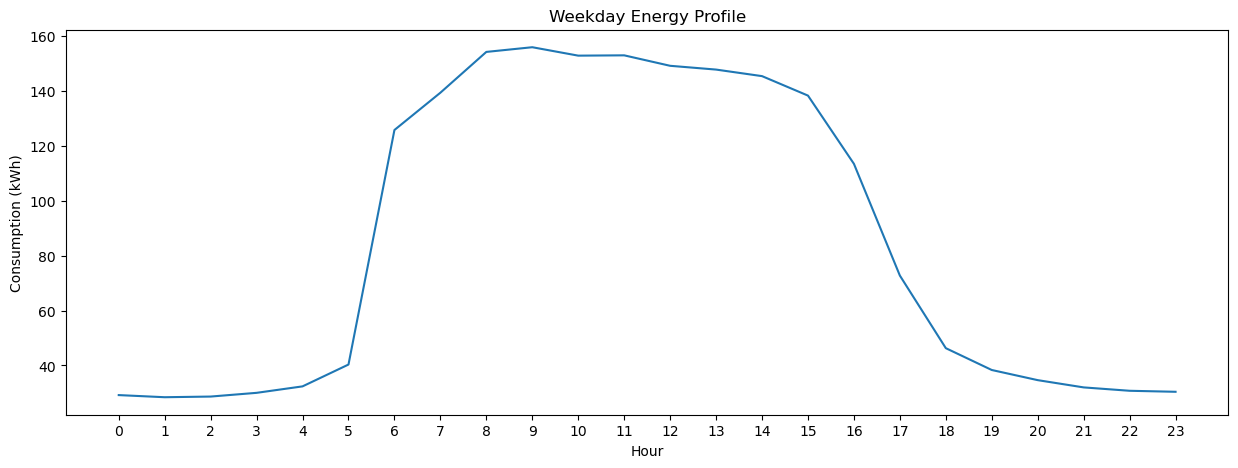

In [4]:
# Create a DataFrame copy for NOT change the originial
data_C = df_consumption.copy()

# Group by weekday
data_C['Weekday'] = data_C['Datetime'].dt.weekday

# Calculate average consumption per hour from Monday to Friday
average_consumption_weekday = data_C.loc[data_C['Weekday'] < 5].groupby(data_C['Datetime'].dt.hour)['Consumption'].mean()* 4

# Create a list of all hours from 0 to 23
all_hours = range(24)

# Convert average_consumption_weekday to a DataFrame
average_consumption_weekday = average_consumption_weekday.to_frame()

# Reset the index to get the hour values as a column
average_consumption_weekday = average_consumption_weekday.reset_index()

# Rename the columns to "Datetime" and "Consumption"
average_consumption_weekday.columns = ["Datetime", "Consumption"]

# Fill missing hours with 0 average consumption
average_consumption_weekday = average_consumption_weekday.reindex(all_hours, fill_value=0)

# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Plot the average consumption per hour from Monday to Friday
plt.plot(average_consumption_weekday["Consumption"].index, average_consumption_weekday["Consumption"].values)
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.title('Weekday Energy Profile')

# Set the tick locations on the x-axis to display all hours
plt.xticks(all_hours)

plt.show()

In [5]:
#Values of average Consumption
average_consumption_weekday.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Datetime,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,14.000000,15.000000,16.000000,17.00000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
Consumption,29.193312,28.417472,28.658736,30.015799,32.371375,40.330855,125.823773,139.419877,154.289204,155.998677,...,145.463552,138.366149,113.495703,72.75966,46.297584,38.340892,34.642007,31.997212,30.766171,30.397955


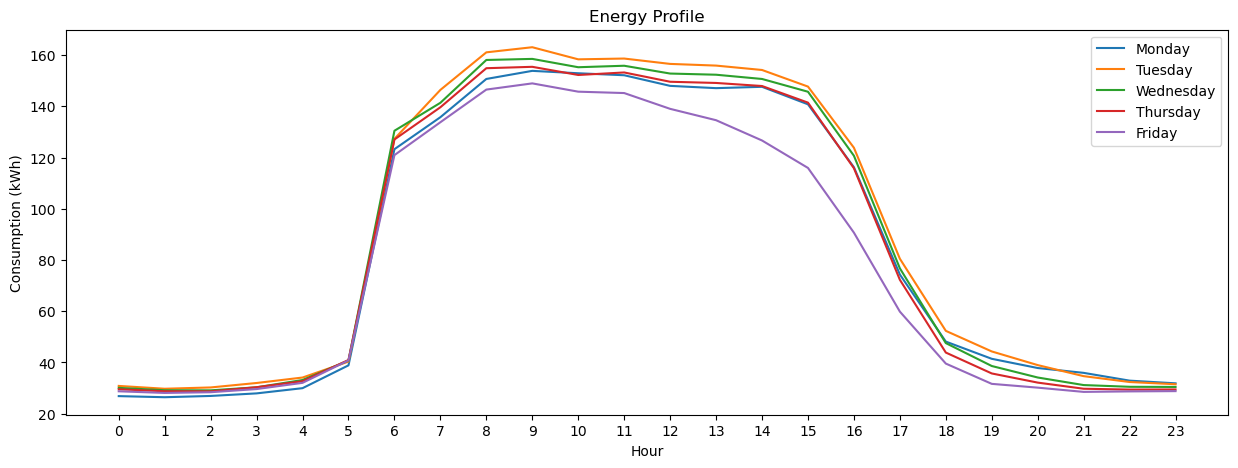

In [6]:
# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Create a list of all weekdays
weekdays = range(0, 5)  # Monday to Sunday

# Plot a line for each weekday
for weekday in weekdays:
    # Filter data for the current weekday
    weekday_data = data_C.loc[data_C['Weekday'] == weekday]

    # Calculate average consumption per hour for the weekday
    average_consumption_weekday = weekday_data.groupby(weekday_data['Datetime'].dt.hour)['Consumption'].mean() * 4

    # Convert average_consumption_weekday to a DataFrame
    average_consumption_weekday = average_consumption_weekday.to_frame()

    # Reset the index to get the hour values as a column
    average_consumption_weekday = average_consumption_weekday.reset_index()

    # Rename the columns to "Datetime" and "Consumption"
    average_consumption_weekday.columns = ["Datetime", "Consumption"]

    # Fill missing hours with 0 average consumption
    average_consumption_weekday = average_consumption_weekday.reindex(all_hours, fill_value=0)

    # Get the weekday name
    weekday_name = calendar.day_name[weekday]

    # Plot the average consumption per hour for the current weekday
    plt.plot(average_consumption_weekday["Datetime"], average_consumption_weekday["Consumption"], label=weekday_name)

plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.title('Energy Profile')
plt.legend()

# Set the tick locations on the x-axis to display all hours
plt.xticks(all_hours)

# Hide the output of xtick labels
_, _ = plt.xticks()

plt.show()


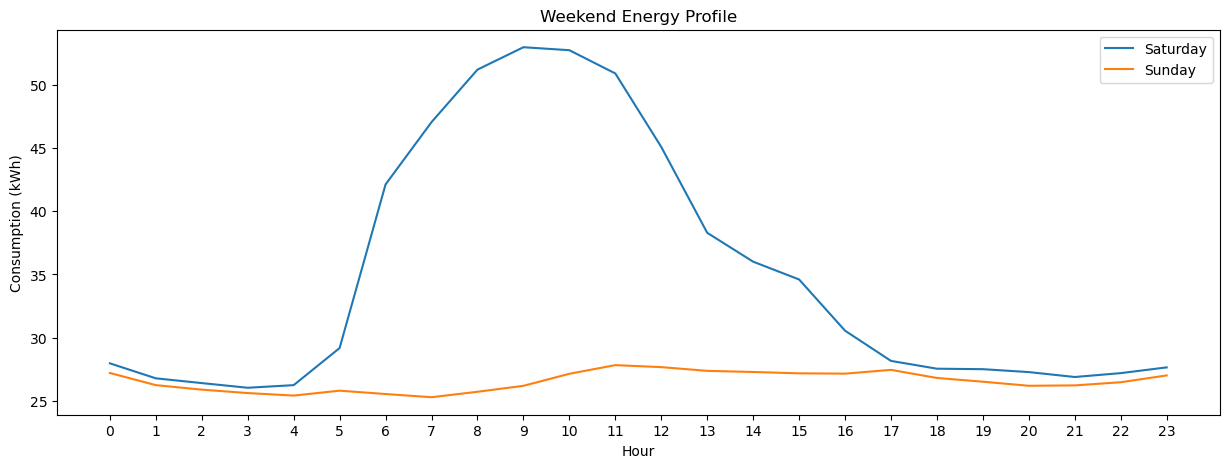

In [7]:
# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Create a list of weekends (Saturday and Sunday)
weekends = range(5, 7)

# Plot a line for each weekend day
for weekend in weekends:
    # Filter data for the current weekend day
    weekend_data = data_C.loc[data_C['Weekday'] == weekend]

    # Calculate average consumption per hour for the weekend day
    average_consumption_weekend = weekend_data.groupby(weekend_data['Datetime'].dt.hour)['Consumption'].mean() * 4

    # Convert average_consumption_weekend to a DataFrame
    average_consumption_weekend = average_consumption_weekend.to_frame()

    # Reset the index to get the hour values as a column
    average_consumption_weekend = average_consumption_weekend.reset_index()

    # Rename the columns to "Datetime" and "Consumption"
    average_consumption_weekend.columns = ["Datetime", "Consumption"]

    # Fill missing hours with 0 average consumption
    average_consumption_weekend = average_consumption_weekend.reindex(all_hours, fill_value=0)

    # Get the weekend day name
    weekend_name = calendar.day_name[weekend]

    # Plot the average consumption per hour for the current weekend day
    plt.plot(average_consumption_weekend["Datetime"], average_consumption_weekend["Consumption"], label=weekend_name)

plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.title('Weekend Energy Profile')
plt.legend()

# Set the tick locations on the x-axis to display all hours
plt.xticks(all_hours)

# Hide the output of xtick labels
_, _ = plt.xticks()

plt.show()

In [8]:
average_consumption_weekend.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Datetime,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,14.00000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
Consumption,27.212037,26.251852,25.896262,25.625926,25.426852,25.814815,25.549074,25.297222,25.726852,26.197222,...,27.29075,27.185194,27.159259,27.458324,26.818519,26.523148,26.201852,26.231481,26.481481,27.019444


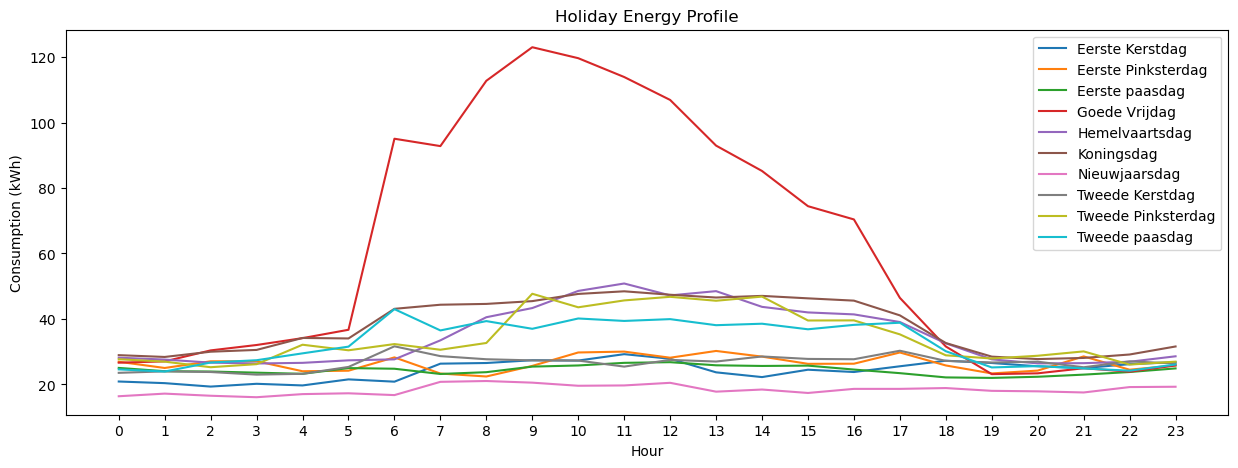

In [9]:
# Get the list of holidays
holiday_list = holidays.Netherlands(years=data_C['Datetime'].dt.year.unique())

# Filter the DataFrame for holidays
holiday_data = data_C[data_C['Datetime'].dt.date.isin(holiday_list.keys())]

# Group the holidays by name
holiday_grouped = holiday_data.groupby(holiday_data['Datetime'].dt.date.map(holiday_list)).size()

# Create a list with the names of the holidays
holiday_names = list(holiday_grouped.index)
    
# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Plot a line for each holiday
for holiday_name in holiday_names:
    # Filter data for the current holiday
    holiday_data = data_C.loc[data_C['Datetime'].dt.date.map(holiday_list) == holiday_name]

    # Calculate average consumption per hour for the holiday
    average_consumption_holiday = holiday_data.groupby(holiday_data['Datetime'].dt.hour)['Consumption'].mean() * 4

    # Convert average_consumption_holiday to a DataFrame
    average_consumption_holiday = average_consumption_holiday.to_frame()

    # Reset the index to get the hour values as a column
    average_consumption_holiday = average_consumption_holiday.reset_index()

    # Rename the columns to "Datetime" and "Consumption"
    average_consumption_holiday.columns = ["Datetime", "Consumption"]

    # Fill missing hours with 0 average consumption
    average_consumption_holiday = average_consumption_holiday.reindex(all_hours, fill_value=0)

    # Plot the average consumption per hour for the current holiday
    plt.plot(average_consumption_holiday["Datetime"], average_consumption_holiday["Consumption"], label=holiday_name)

plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.title('Holiday Energy Profile')
plt.legend()

# Set the tick locations on the x-axis to display all hours
plt.xticks(all_hours)

# Hide the output of xtick labels
_, _ = plt.xticks()

plt.show()

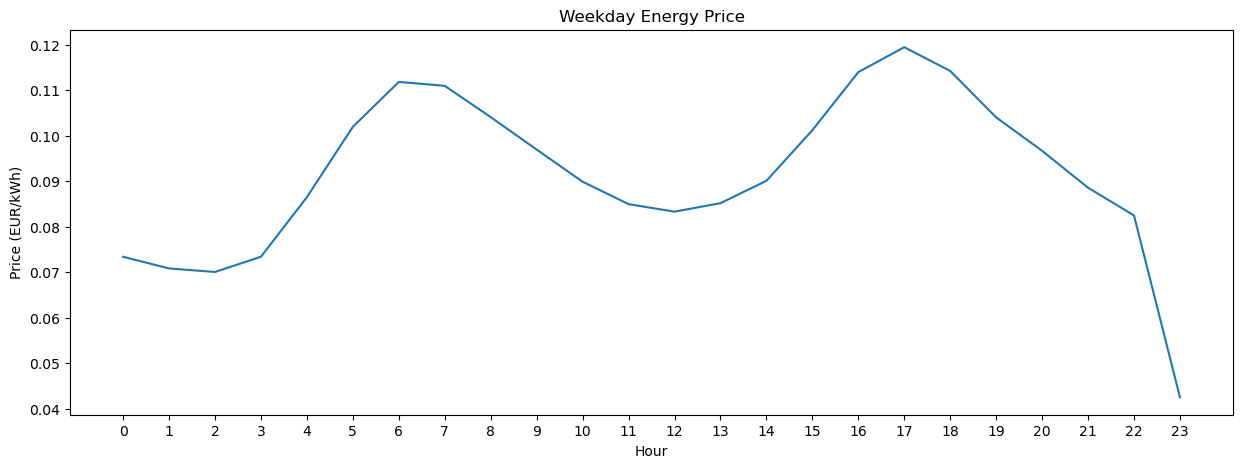

In [10]:
# Create a copy of the DataFrame
data_P = df_price.copy()

# Convert the "Date" and "Hour" columns to datetime
data_P['Datetime'] = pd.to_datetime(data_P['Date'] + ' ' + data_P['Hour'], format='%Y-%m-%d %H:%M')

# Group by weekday
data_P['Weekday'] = data_P['Datetime'].dt.weekday

# Calculate average price per hour from Monday to Friday
average_price_weekday = data_P.loc[data_P['Weekday'] < 5].groupby(data_P['Datetime'].dt.hour)['Import Grid (EUR/kWh)'].mean()

# Create a list of all hours from 0 to 23
all_hours = range(24)

# Convert average_price_weekday to a DataFrame
average_price_weekday = average_price_weekday.to_frame()

# Reset the index to get the hour values as a column
average_price_weekday = average_price_weekday.reset_index()

# Rename the columns to "Datetime" and "Import Grid (EUR/kWh)"
average_price_weekday.columns = ["Datetime", "Import Grid (EUR/kWh)"]

# Fill missing hours with 0 average price
average_price_weekday = average_price_weekday.reindex(all_hours, fill_value=0)

# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Plot the average price per hour from Monday to Friday
plt.plot(average_price_weekday["Datetime"], average_price_weekday["Import Grid (EUR/kWh)"])
plt.xlabel('Hour')
plt.ylabel('Price (EUR/kWh)')
plt.title('Weekday Energy Price')

# Set the tick locations on the x-axis to display all hours
plt.xticks(all_hours)

plt.show()

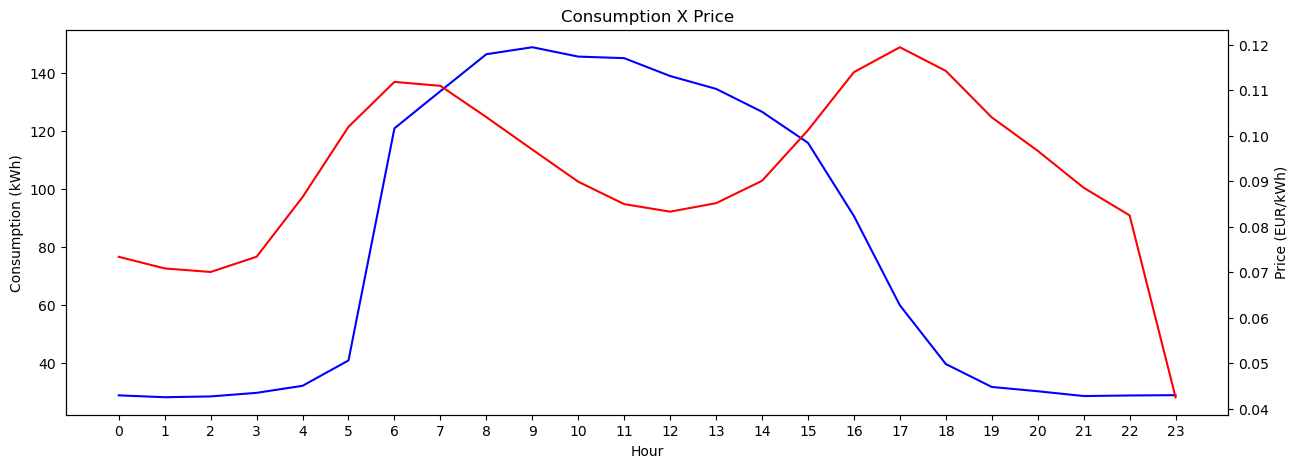

In [11]:
# Increase the width of the plot
plt.figure(figsize=(15, 5))

# Create the first plot for average consumption per hour from Monday to Friday
plt.plot(average_consumption_weekday["Datetime"], average_consumption_weekday["Consumption"], color='blue')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')
plt.title('Consumption X Price')

# Create the second plot for average price per hour from Monday to Friday
plt.twinx()
plt.plot(average_price_weekday["Datetime"], average_price_weekday["Import Grid (EUR/kWh)"], color='red')
plt.ylabel('Price (EUR/kWh)')

# Set the tick locations on the x-axis to display all hours
plt.xticks(all_hours)

# Display the combined plot
plt.show()

In [12]:
# Calculate the difference between each hour and its previous hour
hourly_diff = average_consumption_weekday['Consumption'].diff()

# Find the index of the peak positive and negative values
peak_positive_index = np.argmax(hourly_diff)

# Get the corresponding hour value
peak_positive_hour = average_consumption_weekday['Datetime'].iloc[peak_positive_index]

# Save the last value before the peak positive hour
last_value_before_peak = average_consumption_weekday['Consumption'].iloc[peak_positive_index -2]

# Define the peak negative threshold as 50% above the last value before the peak
peak_negative_threshold = last_value_before_peak * 1.1

# Find the hour when the consumption returns to the threshold
peak_negative_hour = average_consumption_weekday.loc[average_consumption_weekday['Consumption'] >= peak_negative_threshold, 'Datetime'].idxmax()

# Format the peak positive and negative hours as time
peak_positive_hour_formatted = datetime.strptime(str(peak_positive_hour), "%H").strftime("%H:%M")
peak_negative_hour_formatted = datetime.strptime(str(peak_negative_hour), "%H").strftime("%H:%M")

# Print the peak positive and negative hours
print("Peak Positive Hour:", peak_positive_hour_formatted)
print("Peak Negative Hour:", peak_negative_hour_formatted)

Peak Positive Hour: 06:00
Peak Negative Hour: 18:00


In [13]:
# Filter the consumption data between the peak positive and negative hours
peak_price = average_price_weekday.loc[(average_price_weekday['Datetime'] >= peak_positive_hour) & (average_price_weekday['Datetime'] < peak_negative_hour), 'Import Grid (EUR/kWh)']

# Filter the consumption data out the peak positive and negative hours
off_peak_price = average_price_weekday.loc[(average_price_weekday['Datetime'] >= peak_negative_hour) | (average_price_weekday['Datetime'] < peak_positive_hour), 'Import Grid (EUR/kWh)']

# Average, Min e Max and Total consumption during peak hours
average_peak_price = peak_price.mean()
max_peak_price = peak_price.max()
min_peak_price = peak_price.min()

# Average, Min e Max consumption outside peak hours
average_offpeak_price = off_peak_price.mean()
max_offpeak_price = off_peak_price.max()
min_offpeak_price = off_peak_price.min()

# Print the peak consumption with two decimal places
print("Average Peak Price: {:.5f}".format(average_peak_price))
print("Max Peak Price: {:.5f}".format(max_peak_price))
print("Min Peak Price: {:.5f}".format(min_peak_price))

print("\n")

# Print the total peak consumption with two decimal places
print("Average Off Peak Price: {:.5f}".format(average_offpeak_price))
print("Max Off Peak Price: {:.5f}".format(max_offpeak_price))
print("Min Out Peak Price: {:.5f}".format(min_offpeak_price))

Average Peak Price: 0.09935
Max Peak Price: 0.11948
Min Peak Price: 0.08332


Average Off Peak Price: 0.08374
Max Off Peak Price: 0.11427
Min Out Peak Price: 0.04253
